# Matplotlib & Seaborn - Barplots

---

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as plt_patches
import matplotlib.patheffects as plt_eff
import seaborn as sns

---

## Datasets

In [2]:
tips = sns.load_dataset("tips")

---

# Horizontal Ungrouped Barplot

In [3]:
data = tips.groupby("day")["total_bill"].aggregate(np.mean).reset_index()

custom_order = {"Thur": 3, "Fri": 2, "Sat": 1, "Sun": 0}
data["day_sorted"] = data["day"].map(custom_order)

data.sort_values(by = "day_sorted", ascending = True, inplace = True)
data

,day,total_bill,day_sorted
0,Thur,17.682742,3
1,Fri,17.151579,2
2,Sat,20.441379,1
3,Sun,21.410000,0


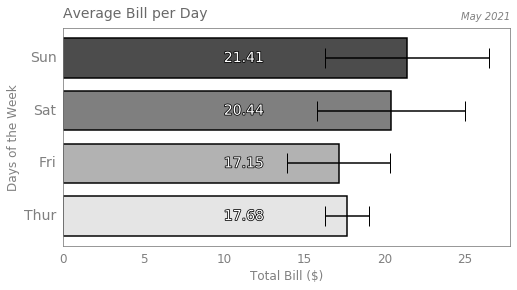

In [4]:
fig, ax = plt.subplots(figsize = (8, 4))
line_edge = [plt_eff.Stroke(linewidth = 1.5, foreground= "k"), plt_eff.Normal()]
ci_errors = [1.4, 3.2, 4.6, 5.1] 

plt.barh(y = data.day,
         width = data.total_bill, height = 0.75,
         edgecolor = "k", linewidth = 1.5,
         xerr = ci_errors, capsize = 10,
         color = [(0,0,0,0.1),
                  (0,0,0,0.3),
                  (0,0,0,0.5),
                  (0,0,0,0.7)])

plt.xticks(ticks = np.arange(0, 30, 5), color = "gray", fontsize = 12, ha = "center", va = "top")
plt.yticks(ticks = data.day, color = "gray", fontsize = 14, ha = "right", va = "center")
plt.xlabel("Total Bill ($)", color = "gray", fontsize = 12)
plt.ylabel("Days of the Week", color = "gray", fontsize = 12)

for i in range(len(data.day)):
    plt.text(x = 10,
             y = data.day[i],
             s = [str(np.round(el, 2)) for el in data.total_bill.values][i],
             color = "w", size = 14, va = "center", path_effects = line_edge)

plt.title(label = "Average Bill per Day",
          y = 1.07, loc = "left", ha = "left", va = "top",
          fontsize = 14, color = "dimgray", style = "normal")

plt.title(label = "May 2021",
          y = 1.05, loc = "right", ha = "right", va = "top",
          fontsize = 10, color = "grey", style = "italic")

plt.tick_params(left = False, bottom = False)
for spine in ax.spines.values():
    spine.set_edgecolor("gray")
    
plt.show()

---

# Vertical Ungrouped Barplot

In [5]:
data = tips.groupby("day")["total_bill"].aggregate(np.mean).reset_index()
data

,day,total_bill
0,Thur,17.682742
1,Fri,17.151579
2,Sat,20.441379
3,Sun,21.410000


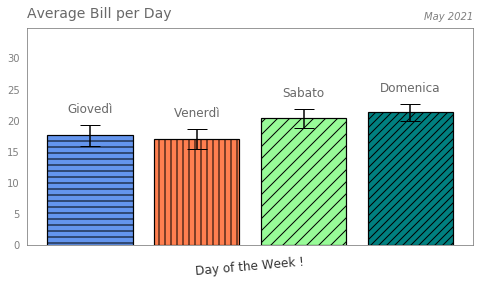

In [6]:
fig, ax = plt.subplots(figsize = (8, 4))

ci_errors = [1.7, 1.6, 1.5, 1.4] 

bar_fig = plt.bar(x = data.day,
                  height = data.total_bill,
                  color = ["cornflowerblue", "coral", "palegreen", "teal"],
                  edgecolor = "k", linewidth = 1.2,
                  yerr = ci_errors, capsize = 10)

patterns = ["-", "/", "||", "///"]

# La densità del pattern è regolata dal numero di caratteri inseriti!
bar_fig[0].set_hatch("--")
bar_fig[1].set_hatch("||")
bar_fig[2].set_hatch("//")
bar_fig[3].set_hatch("///")

# In alternativa si può anche loopare:
# for bar, pattern in zip(bar_fig, patterns):
    # bar.set_hatch(pattern)

on_top_labels = ["Giovedì", "Venerdì", "Sabato", "Domenica"]
for i in range(len(data.day)):
    plt.text(x = data.day[i],
             y = data.total_bill[i] + ci_errors[i] + 2,
             s = on_top_labels[i],
             color = "dimgray", size = 12, ha = "center")

plt.title(label = "Average Bill per Day",
          y = 1.07, loc = "left", ha = "left", va = "top",
          fontsize = 14, color = "dimgray", style = "normal")

plt.title(label = "May 2021",
          y = 1.05, loc = "right", ha = "right", va = "top",
          fontsize = 10, color = "grey", style = "italic")

plt.xticks([])
plt.yticks(ticks = np.arange(0, 35, 5), color = "gray", fontsize = 10, ha = "right", va = "center")

plt.xlabel(xlabel = "Day of the Week !",
           fontweight = "light", color = (0,0,0,0.8),
           fontsize = 12, rotation = 5, labelpad = 10)

plt.ylim(0, 35)
plt.tick_params(left = False, bottom = False)
for spine in ax.spines.values():
    spine.set_edgecolor("gray")

plt.show()

---

# Grouped Barplot

In [7]:
data = tips.groupby(["day", "smoker"])["total_bill"].aggregate(np.mean).reset_index()
data

,day,smoker,total_bill
0,Thur,Yes,19.190588
1,Thur,No,17.113111
2,Fri,Yes,16.813333
3,Fri,No,18.420000
4,Sat,Yes,21.276667
5,Sat,No,19.661778
6,Sun,Yes,24.120000
7,Sun,No,20.506667


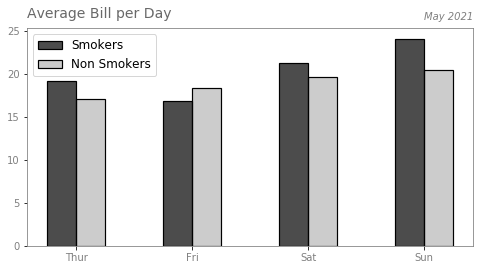

In [8]:
fig, ax = plt.subplots(figsize = (8, 4))

# Sfrutto la bar_width per posizionare le barre dei fumatori e non fumatori una accanto all'altra
bar_width = 0.25

# Array posizionali per le barre
smoker_pos = np.arange(len(data.day.unique()))
non_smoker_pos = np.arange(len(data.day.unique())) + bar_width

plt.bar(x = smoker_pos,
        height = data[data.smoker == "Yes"].total_bill,
        width = bar_width,
        color = (0,0,0,0.7),
        label = "Smokers",
        edgecolor = "k", linewidth = 1.2)

plt.bar(x = non_smoker_pos,
        height = data[data.smoker == "No"].total_bill,
        width = bar_width,
        color = (0,0,0,0.2),
        label = "Non Smokers",
        edgecolor = "k", linewidth = 1.2)

# Il tick va al centro delle due barre
xticks_pos = (smoker_pos + non_smoker_pos) / 2
plt.xticks(xticks_pos, data.day.unique(), color = "gray")
plt.yticks(color = "gray")

plt.title(label = "Average Bill per Day",
          y = 1.07, loc = "left", ha = "left", va = "top",
          fontsize = 14, color = "dimgray", style = "normal")

plt.title(label = "May 2021",
          y = 1.05, loc = "right", ha = "right", va = "top",
          fontsize = 10, color = "grey", style = "italic")

for spine in ax.spines.values():
    spine.set_edgecolor("gray")
    
plt.legend(fontsize = 12)
plt.show()

---

# Stacked Barplot

In [9]:
data = tips.groupby(["day", "smoker"])["total_bill"].aggregate(np.sum).reset_index()
data

,day,smoker,total_bill
0,Thur,Yes,326.24
1,Thur,No,770.09
2,Fri,Yes,252.20
3,Fri,No,73.68
4,Sat,Yes,893.62
5,Sat,No,884.78
6,Sun,Yes,458.28
7,Sun,No,1168.88


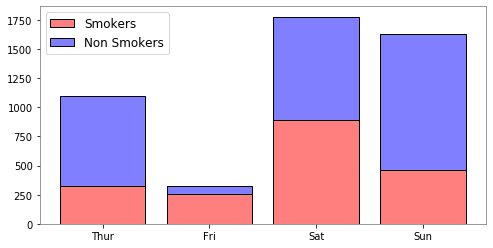

In [10]:
fig, ax = plt.subplots(figsize = (8, 4))

plt.bar(x = data.day.unique(),
        height = data[data.smoker == "Yes"].total_bill,
        color = (1,0,0,0.5),
        label = "Smokers",
        edgecolor = "k")

plt.bar(x = data.day.unique(),
        height = data[data.smoker == "No"].total_bill,
        bottom = data[data.smoker == "Yes"].total_bill,
        color = (0,0,1,0.5),
        label = "Non Smokers",
        edgecolor = "k")

for spine in ax.spines.values():
    spine.set_edgecolor("gray")
    
plt.legend(fontsize = 12)
plt.show()

---

# Stacked Percentage Barplot

In [11]:
data = tips.groupby(["day", "smoker"])["total_bill"].aggregate(np.sum).reset_index()
data = data.merge(data.groupby("day")["total_bill"].aggregate(np.sum), on = "day", how = "inner")
data.rename(columns = {"total_bill_y": "sum_total_bill_per_day", "total_bill_x": "total_bill"}, inplace = True)
data["total_bill_day_pct"] = data["total_bill"] / data["sum_total_bill_per_day"] * 100
data

,day,smoker,total_bill,sum_total_bill_per_day,total_bill_day_pct
0,Thur,Yes,326.24,1096.33,29.757464
1,Thur,No,770.09,1096.33,70.242536
2,Fri,Yes,252.20,325.88,77.390450
3,Fri,No,73.68,325.88,22.609550
4,Sat,Yes,893.62,1778.40,50.248538
5,Sat,No,884.78,1778.40,49.751462
6,Sun,Yes,458.28,1627.16,28.164409
7,Sun,No,1168.88,1627.16,71.835591


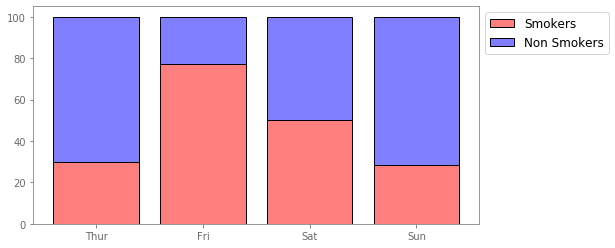

In [12]:
fig, ax = plt.subplots(figsize = (8, 4))

plt.bar(x = data.day.unique(),
        height = data[data.smoker == "Yes"].total_bill_day_pct,
        color = (1,0,0,0.5),
        label = "Smokers",
        edgecolor = "k")

plt.bar(x = data.day.unique(),
        height = data[data.smoker == "No"].total_bill_day_pct,
        bottom = data[data.smoker == "Yes"].total_bill_day_pct,
        color = (0,0,1,0.5),
        label = "Non Smokers",
        edgecolor = "k")

leg = ax.legend(bbox_to_anchor = (1, 1), fontsize = 12)

ax.tick_params(color = "dimgray", labelcolor = "dimgray")
for spine in ax.spines.values():
    spine.set_edgecolor("gray")

plt.show()

---

# Seaborn Barplot

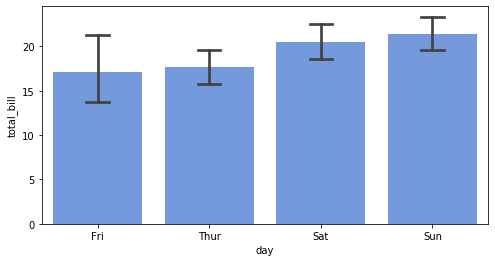

In [13]:
fig, ax = plt.subplots(figsize = (8, 4))

plot_order = tips.groupby("day")["total_bill"].aggregate(np.mean).sort_values().index.to_list()

sns.barplot(
    x = "day", 
    y = "total_bill", 
    data = tips, 
    estimator = np.mean, 
    ci = 95, 
    order = plot_order, 
    orient = "v",
    color = "cornflowerblue",
    capsize = 0.2)

plt.show()

---